### NLTK Inaugural

In [1]:
import nltk
nltk.download(['brown', 'inaugural'])  # lookup error

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\kupa1\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\kupa1\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [2]:
brown = nltk.corpus.brown

In [4]:
# cfd
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
modals = ['can', 'could', 'would', 'will', 'might', 'may']
cfd.tabulate(conditions=brown.categories(), samples = modals)

                  can could would  will might   may 
      adventure    46   151   191    50    58     5 
 belles_lettres   246   213   392   236   113   207 
      editorial   121    56   180   233    39    74 
        fiction    37   166   287    52    44     8 
     government   117    38   120   244    13   153 
        hobbies   268    58    78   264    22   131 
          humor    16    30    56    13     8     8 
        learned   365   159   319   340   128   324 
           lore   170   141   186   175    49   165 
        mystery    42   141   186    20    57    13 
           news    93    86   244   389    38    66 
       religion    82    59    68    71    12    78 
        reviews    45    40    47    58    26    45 
        romance    74   193   244    43    51    11 
science_fiction    16    49    79    16    12     4 


In [5]:
# modals의 빈도수가 포함된 cfd (word -> modal_verb)
cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can', 'could', 'would', 'will', 'might', 'may']
    
    for word in brown.words(categories=genre)  # 위 두 코드를 연결해주는 코드
        if word.lower() == modal
)
cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


#### Inaugural
- 연설문 코퍼스

In [6]:
inaugural = nltk.corpus.inaugural

In [7]:
inaugural.fileids()  # 연도-대통령이름.txt | '2021-Biden.txt'

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [164]:
# cfd ['america', 'citizien'] 빈도수를 cfd로 만드시오.
cfd2 = nltk.ConditionalFreqDist(
(speech, target)
for speech in inaugural.fileids()
for target in ['america', 'citizen']

for word in inaugural.words(fileids = speech)
    if word.lower() == target
)
cfd2.tabulate()

                    america citizen 
1793-Washington.txt       1       0 
     1797-Adams.txt       5       1 
    1817-Monroe.txt       0       5 
    1821-Monroe.txt       2       0 
     1825-Adams.txt       0       1 
  1837-VanBuren.txt       1       1 
  1841-Harrison.txt       0      11 
    1853-Pierce.txt       0       1 
  1857-Buchanan.txt       1       0 
   1861-Lincoln.txt       0       1 
     1869-Grant.txt       0       2 
     1873-Grant.txt       0       1 
     1877-Hayes.txt       0       1 
  1881-Garfield.txt       1       2 
 1885-Cleveland.txt       0       5 
  1889-Harrison.txt       0       3 
 1893-Cleveland.txt       0       3 
      1909-Taft.txt       4       0 
    1917-Wilson.txt       2       0 
   1921-Harding.txt      15       0 
  1925-Coolidge.txt       8       2 
    1929-Hoover.txt       6       2 
 1937-Roosevelt.txt       1       1 
 1941-Roosevelt.txt       7       1 
 1945-Roosevelt.txt       1       0 
1953-Eisenhower.txt       3       3 
1

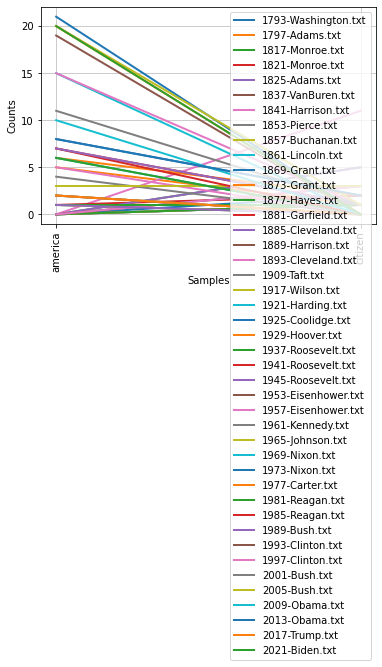

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [165]:
cfd2.plot()

In [166]:
cfd2 = nltk.ConditionalFreqDist(
(target, speech)  # x,y축 변환
for speech in inaugural.fileids()
for target in ['america', 'citizen']

for word in inaugural.words(fileids = speech)
    if word.lower() == target
)
cfd2.tabulate()

        1793-Washington.txt      1797-Adams.txt     1817-Monroe.txt     1821-Monroe.txt      1825-Adams.txt   1837-VanBuren.txt   1841-Harrison.txt     1853-Pierce.txt   1857-Buchanan.txt    1861-Lincoln.txt      1869-Grant.txt      1873-Grant.txt      1877-Hayes.txt   1881-Garfield.txt  1885-Cleveland.txt   1889-Harrison.txt  1893-Cleveland.txt       1909-Taft.txt     1917-Wilson.txt    1921-Harding.txt   1925-Coolidge.txt     1929-Hoover.txt  1937-Roosevelt.txt  1941-Roosevelt.txt  1945-Roosevelt.txt 1953-Eisenhower.txt 1957-Eisenhower.txt    1961-Kennedy.txt    1965-Johnson.txt      1969-Nixon.txt      1973-Nixon.txt     1977-Carter.txt     1981-Reagan.txt     1985-Reagan.txt       1989-Bush.txt    1993-Clinton.txt    1997-Clinton.txt       2001-Bush.txt       2005-Bush.txt      2009-Obama.txt      2013-Obama.txt      2017-Trump.txt      2021-Biden.txt 
america                   1                   5                   0                   2                   0                   1    

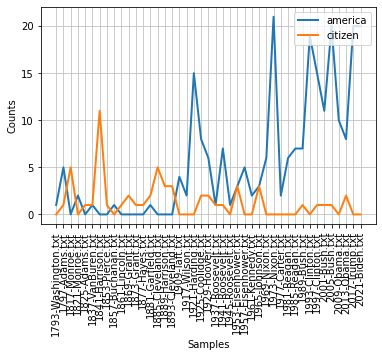

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [167]:
cfd2.plot()

### Tuple & List
- 튜플은 불변객체, 리스트는 가변객체
- 둘 다 중복 가능

In [17]:
#1. 생성
emptyT = ()  # 괄호로 빈 튜플 생성
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

In [19]:
#1.1 요소가 여러 개일 때
alphabetT = ('a', 'b')
alphabetT = 'a', 'b'
alphabetT

('a', 'b')

In [20]:
alphabetL = ['a', 'b']

In [21]:
#1.2 요소가 1개일 때
alphaT = ('a')  # str
type(alphaT)

str

In [22]:
alphaT = ('b',)  # 쉼표(,)를 찍어주면 자료형 tuple
type(alphaT)

tuple

### packing 
- 한 변수에 여러 데이터를 할당하는 것
    - list, tuple 자체 
    - a = [1,2,3,4]

### unpacking 
- 한 변수에 여러 데이터가 들어있을 때 여러 변수에 나누는 것
    - a = 'k', b = 'i', c = 'm'

In [23]:
a, b, c ='kim'  # unpacking
a, b, c

('k', 'i', 'm')

In [169]:
# 값 교환하기
pwd = 'abcd'
userId = 'sky'

#temp1 = userId  # 임시변수 설정
#temp2 = pwd    # 비효율적인 방법
#pwd = temp1
#userId = temp2

In [170]:
# 파이썬 방식 값 교환
pwd, userId = userId, pwd
pwd, userId

('sky', 'abcd')

In [173]:
# 연산
('a',) + (1,2)   # tuple  + tuple

('a', 1, 2)

In [174]:
(1,2) * 3   # tuple x int

(1, 2, 1, 2, 1, 2)

In [175]:
x = ('a',)
y = (1, 2)
id(x), id(y), id(x+y)  # x+y는 새로운 변수에 할당(id로 확인)

(2421939704400, 2421896196224, 2421906712192)

In [426]:
# 비교
x = 1,2
y = 1,6   # 첫번째 값끼리 먼저 비교, 동일하면 두번째 값 비교하는 형식

x < y

True

In [427]:
# 순회: 리스트와 동일
for i in x:
    print(f'{i}번')

1번
2번


In [33]:
[i for i in x]  # 튜플로 컴프리헨션은 잘 안씀

[1, 2]

In [35]:
# tuple comprehension이 있나요?
# 없습니다. 튜플로 변경은 가능
tuple([i for i in x])
*[i for i in x],  # 위에꺼보다 느림

(1, 2)

In [428]:
# 형 변환
name = 'name'
tuple(name), (name)  # 형변환할 때 차이점

(('n', 'a', 'm', 'e'), 'name')

In [429]:
type(tuple(name)), type((name))

(tuple, str)

In [430]:
list(name)

['n', 'a', 'm', 'e']

In [431]:
# slicing 동일하게 가능
nameT = tuple(name)
nameT[0]

'n'

### 정리
- tuple 장점
    - 변하지 않는 데이터 시퀀스를 만들 수 있다. 타인의 접근을 막는다.
        - blue = 1, white = 2, ....  => 변경 불가
    - 메모리 사용이 적다.

- list 장점
    - 튜플 장점 필요없을 때 전부 리스트 사용
    - 데이터를 순차적으로 파악할 때
    - 중복 데이터를 쓸 수 있다느 점 (vs. set)
    

### 리스트의 유용한 함수들
- 변경, 삭제, 추가, 
- 리스트 컴프리헨션 업그레이드

In [181]:
list('abcd')

['a', 'b', 'c', 'd']

In [1]:
num = list(range(5))
num

[0, 1, 2, 3, 4]

In [2]:
# 추가 함수들
num.append(5)  # 마지막에 요소 추가, 하나만 가능
num

[0, 1, 2, 3, 4, 5]

In [3]:
# insert(index, item)
num.insert(0, 8)
num

[8, 0, 1, 2, 3, 4, 5]

In [4]:
# 여러 개 추가
x = [6, 6, 6]
num.extend(x)  # 리스트를 리스트로 확장
num

[8, 0, 1, 2, 3, 4, 5, 6, 6, 6]

In [5]:
num.append(x)  # extend와 append 차이점
num

[8, 0, 1, 2, 3, 4, 5, 6, 6, 6, [6, 6, 6]]

In [67]:
# extend 원리(?)
# num += x
# num

[8, 0, 1, 2, 3, 4, 5, 6, 6, 6, [6, 6, 6], 6, 6, 6]

In [6]:
# slice
num[:3] = 2, 2, 2   # 8,0,1 => 2,2,2
num

[2, 2, 2, 2, 3, 4, 5, 6, 6, 6, [6, 6, 6]]

In [7]:
num[:3] = 'cat'  # unpacking 후 추가(2,2,2 => c,a,t)
num

['c', 'a', 't', 2, 3, 4, 5, 6, 6, 6, [6, 6, 6]]

In [8]:
# 삭제
del num[:3]
num

[2, 3, 4, 5, 6, 6, 6, [6, 6, 6]]

In [9]:
# remove(value)  # index 아님
num.remove([6,6,6])
num

[2, 3, 4, 5, 6, 6, 6]

In [10]:
# pop(index) 기본값 = -1
num.pop()
num

[2, 3, 4, 5, 6, 6]

In [11]:
num.pop(0)
num

[3, 4, 5, 6, 6]

In [12]:
# clear
num.clear()
num

[]

In [13]:
# 인덱스: 해당 인덱스의 값 반환
num = list(range(5))
num.index(4)

4

In [14]:
0 in num

True

In [15]:
# 정렬: sort(), sorted()
sorted(num, reverse = True) # 변한 값 출력하는 것일 뿐, 값이 저장되진 않음

[4, 3, 2, 1, 0]

In [16]:
num  # 값 바뀌지 않음

[0, 1, 2, 3, 4]

In [17]:
num.sort(reverse = True) # 리스트.sort(), 값을 할당하지 않아도 된다
num

[4, 3, 2, 1, 0]

In [18]:
# reversed(), list.reverse()

reversed(num)  # 변한 값 출력하는 것일 뿐, 값이 저장되진 않음
num

[4, 3, 2, 1, 0]

In [19]:
num.reverse()  # 값을 할당하지 않아도 된다
num

[0, 1, 2, 3, 4]

In [20]:
# 할당
a = list(range(1,5))
a

[1, 2, 3, 4]

In [21]:
b = a  # 같은 메모리 주소를 참조하는 것
b[0] = 6
a,b # 따라서 a, b 모두 변한다

([6, 2, 3, 4], [6, 2, 3, 4])

In [22]:
id(a), id(b)  # 동일함

(1904132661376, 1904132661376)

In [23]:
# shallow copy: 참조하지 않고 새로운 객체에 할당하는 방법. 얕은 복사
c = a.copy()
d = list(a)
e = a[:]

id(a), id(c), id(d), id(e)  # 모두 다른 리스트

(1904132661376, 1904133462080, 1904133412672, 1904133465536)

In [24]:
a.append([1,2,3])
a

[6, 2, 3, 4, [1, 2, 3]]

In [25]:
f = a.copy()
f

[6, 2, 3, 4, [1, 2, 3]]

In [26]:
f[-1][0] = 9
a, f   # 얕은복사 했기 때문에 a,f 모두 바뀜

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [9, 2, 3]])

In [27]:
# deep copy: 깊은 복사, 하위에 중첩된 리스트 요소가 안 바뀌도록

import copy
g = copy.deepcopy(a)
g

[6, 2, 3, 4, [9, 2, 3]]

In [28]:
g[-1][0] = 10
a, g   # deep copy이기 때문에 a의 값만 바뀜

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [10, 2, 3]])

In [29]:
# 순회: zip, enumerate
name = ['kate', 'royce', 'phill']
age = [77, 44, 54, 99]   # name은 값이 3개라서, 99는 생략됨

# zip(name, age) = ('kate', 77), ('royce', 44), ('phill', 54)

# (name, age)
for item1, item2 in zip(name, age):
    print((item1, item2))

('kate', 77)
('royce', 44)
('phill', 54)


In [30]:
for item1 in name:
    for item2 in age:
        print((item1, item2))

('kate', 77)
('kate', 44)
('kate', 54)
('kate', 99)
('royce', 77)
('royce', 44)
('royce', 54)
('royce', 99)
('phill', 77)
('phill', 44)
('phill', 54)
('phill', 99)


In [99]:
list(zip(name,age))

[('kate', 77), ('royce', 44), ('phill', 54)]

In [100]:
# 리스트 + 인덱스 enumerate
for idx, item in enumerate(name):
    print(idx, item)

0 kate
1 royce
2 phill


In [246]:
# 리스트 컴프리헨션
[word for word in zip(name, age)]
[(i, j) for i, j in zip(name, age)]

[('kate', 77), ('royce', 44), ('phill', 54)]

In [248]:
# name, age를 이용해서 새로운 리스트를 생성하는데 (이름, 나이)의 형태, for문 사용(리.컴 사용 X)
new_list = []
for i, j in zip(name, age):
    new_list.append((i, j)) # append 사용
print(new_list)

[('kate', 77), ('royce', 44), ('phill', 54)]


### Quiz

#1. for문을 리.컴으로 바꿔보기

#2. [i, j] 리스트의 리스트로 바꿔보기(리.컴)

In [122]:
#1.
for i in name:
    for j in age:
        print(i, j)

list_com = [(i,j) for i in name for j in age]
list_com

[('kate', 77),
 ('kate', 44),
 ('kate', 54),
 ('royce', 77),
 ('royce', 44),
 ('royce', 54),
 ('phill', 77),
 ('phill', 44),
 ('phill', 54)]

In [131]:
#2. 
output = []
for i in name:
    empty = []
    for j in age:
        empty.append((i,j))
    output.append(empty)
output

[[('kate', 77), ('kate', 44), ('kate', 54)],
 [('royce', 77), ('royce', 44), ('royce', 54)],
 [('phill', 77), ('phill', 44), ('phill', 54)]]

In [249]:
[[(i,j) for i in name] for j in age]

[[('kate', 77), ('royce', 77), ('phill', 77)],
 [('kate', 44), ('royce', 44), ('phill', 44)],
 [('kate', 54), ('royce', 54), ('phill', 54)]]

In [137]:
sentence = 'do not judge a book by its cover'
# [(대문자, 첫글자 대문자, 글자수),..]의 리스트 만들기
[(word.upper(), word.title(), len(word)) for word in sentence.split(' ')]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [138]:
text = [
    ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
    ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']
]
#1. 문장마다 스트링으로 변환해서 리스트로 변환
    # ['문장1', '문장2']
#2. 전체를 스트링으로 변환
    # '문장1 문장2'
#3. 전체 단어 리스트 가져오기
    # [sunja, said, goodnight, ...]

In [147]:
#1. 
[' '.join(sent) for sent in text]

['Sunja said goodnight to her mother', 'Hansu was no longer in Busan']

In [151]:
#2.
' '.join([' '.join(sent) for sent in text])

'Sunja said goodnight to her mother Hansu was no longer in Busan'

In [254]:
#3.
[word for sent in text for word in sent]

['Sunja',
 'said',
 'goodnight',
 'to',
 'her',
 'mother',
 'Hansu',
 'was',
 'no',
 'longer',
 'in',
 'Busan']

In [153]:
# if문 - else 리컴에서 구현
[i for i in range(10)]  # 짝수 가져오고, 홀수 = '홀수'

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [255]:
[i for i in range(10) if i%2 == 0 else '홀수']  # X

SyntaxError: invalid syntax (Temp/ipykernel_23160/1504297968.py, line 1)

In [31]:
[i if i%2 == 0 else '홀수' for i in range(10)]  # O
# for 앞에 if문이 와야하고,
# 반드시 else문도 함께 있어야함

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']

# Quiz: brown 정제하기

- [ ['They', 'neither', 'liked', ...], [] ] 형식 지키기
- 문장 분절 -> 단어 분절
- 불필요한 것들 제거하기
    - 문장부호, POS제거
    - 's, 'nt (she's -> she, 's) (don't -> don, 't)
    - 'fly-dotted' -> fly, dotted

In [424]:
import nltk
nltk.download('brown')
brown = nltk.corpus.brown

brown.raw(categories = 'romance')[:5000] 

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\kupa1\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


"\n\n\tThey/ppss neither/cc liked/vbd nor/cc disliked/vbd the/at Old/jj-tl Man/nn-tl ./.\nTo/in them/ppo he/pps could/md have/hv been/ben the/at broken/vbn bell/nn in/in the/at church/nn tower/nn which/wdt rang/vbd before/in and/cc after/in Mass/nn-tl ,/, and/cc at/in noon/nn ,/, and/cc at/in six/cd each/dt evening/nn --/-- its/pp$ tone/nn ,/, repetitive/jj ,/, monotonous/jj ,/, never/rb breaking/vbg the/at boredom/nn of/in the/at streets/nns ./.\nThe/at Old/jj-tl Man/nn-tl was/bedz unimportant/jj ./.\n\n\n\tYet/rb if/cs he/pps were/bed not/* there/rb ,/, they/ppss would/md have/hv missed/vbn him/ppo ,/, as/cs they/ppss would/md have/hv missed/vbn the/at sounds/nns of/in bees/nns buzzing/vbg against/in the/at screen/nn door/nn in/in early/jj June/np ;/. ;/.\nor/cc the/at smell/nn of/in thick/jj tomato/nn paste/nn --/-- the/at ripe/jj smell/nn that/wps was/bedz both/abx sweet/jj and/cc sour/jj --/-- rising/vbg up/rp from/in aluminum/nn trays/nns wrapped/vbn in/in fly-dotted/jj cheeseclo